<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [117]:
student_number = "401105872"
full_name = "Armin Khosravi"
assert student_number and full_name is not None, 'please input your information'

In [118]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [119]:
# todo
df = pd.read_csv("dataset.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Display dataset information.

In [120]:
# todo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [121]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: 

In my view, the Customer ID is the least relevant column in this dataset. It serves primarily as a unique identifier to access individual customer information within the database, rather than providing any actual characteristics or behavioral insights about the customer. Therefore, it doesn’t contribute as a meaningful feature for analysis.

In [122]:
# Exclude irrelevant feature

df = df.drop(columns=['CUST_ID'])
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


how do you handle missing data, and why did you choose this method?
<br>
Answer: 

As shown in the below previous cell, the only columns with missing values are CREDIT_LIMIT and MINIMUM_PAYMENTS. For CREDIT_LIMIT, which has only one missing value, we could remove the row, but I prefer to fill it with the median. Filling with the median is a better choice because it minimally impacts the overall data distribution and is less sensitive to outliers than the mean.

I will also fill the missing values in MINIMUM_PAYMENTS using the median for the same reason, as it helps retain the integrity of the data distribution without introducing bias.

In [123]:
df.isnull().sum()


BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [124]:
#Fill missing data
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


plot the correlation matrix and identify redundant features.remove them from the dataframe.

<function matplotlib.pyplot.show(close=None, block=None)>

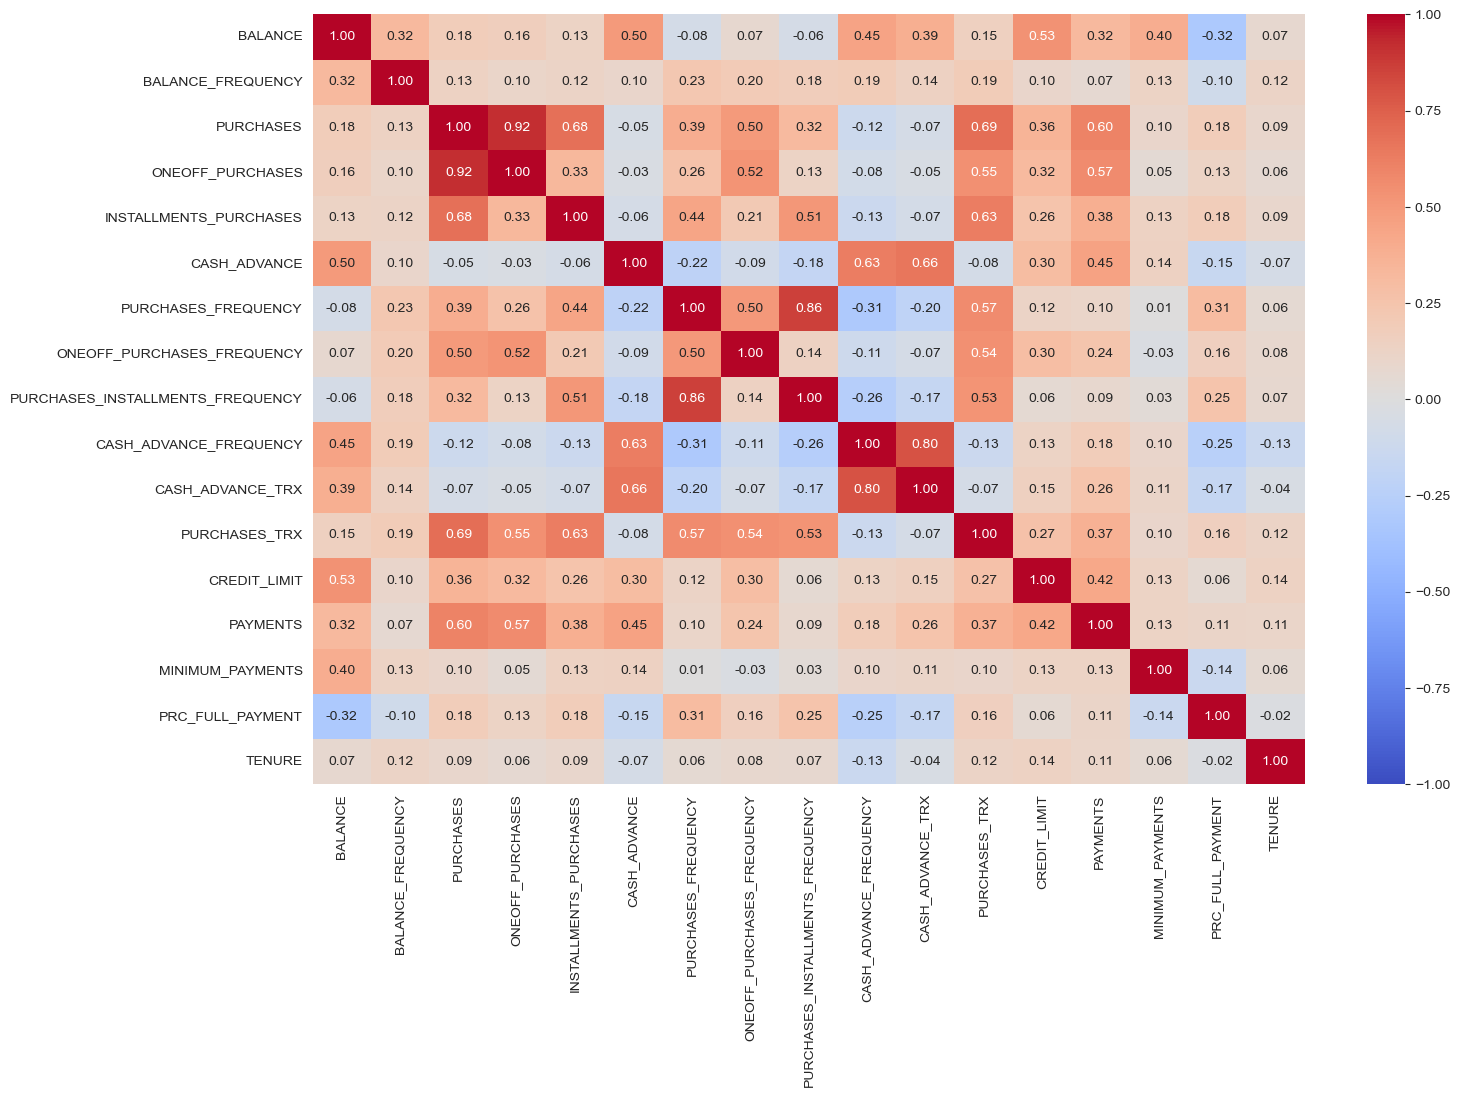

In [125]:
# Plot the correlation matrix

correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.show

In [126]:
# Identify and remove redundant features. use 0.8 threshold.
abs_corr = correlation_matrix.abs()
n_features, _ = correlation_matrix.shape
similar_cols = set()
for i in range(n_features):
    for j in range(i + 1, n_features):
        if abs_corr.iloc[i, j] > 0.8:
            similar_cols.add((df.columns[i], df.columns[j]))

# i only delete one of the columns between the pairs
drop_cols = [col2 for col1, col2 in similar_cols]
print(drop_cols)
df = df.drop(columns=drop_cols)
df

['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [127]:
# todo
scaler = StandardScaler()
z_normalized = scaler.fit_transform(df)
df_z_normalized = pd.DataFrame(z_normalized, columns=df.columns)
df_z_normalized

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.132643,-0.466786,1.269843,-0.678661,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.122823,-0.466786,1.269843,-0.678661,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.294893,-0.466786,0.854576,-0.678661,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.454576,-0.449352,-1.221758,-0.678661,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


Why is it important to standardize the data before applying PCA?
<br>
Answer:

Principal Component Analysis (PCA) relies on distance metrics, such as Euclidean distance, to evaluate how far apart data points are in the feature space. However, when the feature vectors are on different scales, they can disproportionately influence the distance calculations. This discrepancy can lead to misleading results, as features with larger scales may dominate the analysis. Therefore, it is essential to standardize the features to ensure they are on the same scale before applying PCA.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:


Here’s a revised version of your text with improved structure and clarity:

StandardScaler removes the mean and scales the variance to 1, ensuring that PCA is not affected by the scale of the features. This allows PCA to focus on the variance in the data and accurately identify the directions that maximize variance.

In contrast, the Normalizer scales each feature vector to have a norm of 1. While this method ensures that all samples have the same length, it does not account for the variance across different features. As a result, Normalizer may not be suitable for PCA, as it can obscure the relationships between features and hinder the ability to find meaningful principal components.

## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [128]:
import numpy as np


class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None  # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        n_samples, n_features = X.shape
        # cov_matrix = X.T @ X / (n_features - 1)
        # self.mean = X.mean(axis = 0)
        # X_centered = X - self.mean
        cov_matrix = np.cov(X, rowvar=False)

        eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

        sorted_indices = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[sorted_indices]
        eigen_vectors = eigen_vectors[:, sorted_indices]

        if self.n_components:
            eigen_vectors = eigen_vectors[:, :self.n_components]
            eigen_values = eigen_values[:self.n_components]

        self.components = eigen_vectors
        self.explained_variance_ratio = eigen_values / eigen_values.sum()

    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        # Return the transformed data

        return np.dot(X, self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer:
check the code 

In [129]:
custom_pca = CustomPCA()
custom_pca.fit(df_z_normalized)

explained_variance_ratio = custom_pca.get_explained_variance_ratio()
cumulative_sum = np.cumsum(explained_variance_ratio)
cumulative_sum


array([0.2541083 , 0.47661703, 0.56375628, 0.63899948, 0.70469992,
       0.76058004, 0.8140162 , 0.85745353, 0.89487545, 0.92550348,
       0.94569795, 0.96250476, 0.97837154, 0.99000092, 1.        ])

In [130]:
threshold = 0.75

first_above = np.argmax(cumulative_sum >= 0.75)

print(f"n_component needed for Cumulative Variance >={threshold} equal to {first_above + 1}")

n_component needed for Cumulative Variance >=0.75 equal to 6


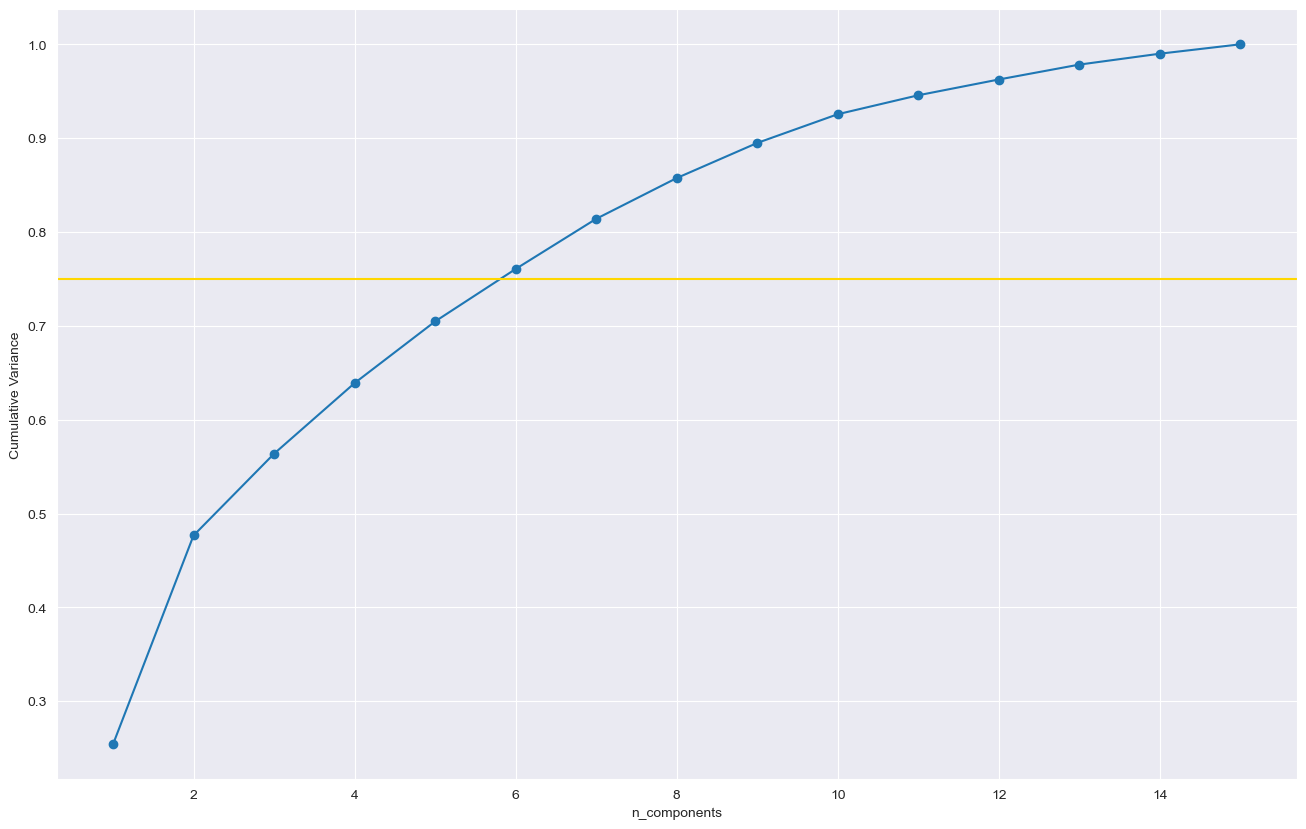

In [131]:
# todo
plt.figure(figsize=(16, 10))
plt.plot(range(1, len(cumulative_sum) + 1), cumulative_sum, marker='o')

plt.xlabel("n_components")
plt.ylabel("Cumulative Variance")
plt.axhline(y=0.75, color='gold', linestyle='-')

plt.grid(True)
plt.show()



Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [132]:
#Build a new DataFrame with the first selected components

n_components = 6

custom_pca = CustomPCA(n_components=n_components)

custom_pca.fit(df_z_normalized)
reduced_data = custom_pca.transform(df_z_normalized)

columns = [f'PC{i + 1}' for i in range(n_components)]
reduced_data_df = pd.DataFrame(reduced_data, columns=columns)

reduced_data_df.to_csv('pca_output.csv', index=False)

reduced_data_df


,PC1,PC2,PC3,PC4,PC5,PC6
0,1.731242,0.824084,-0.384320,-0.451623,-0.087766,0.438057
1,0.301398,-2.533638,0.621582,-0.939313,-0.794456,0.060615
2,-1.194199,0.887568,-1.184455,1.129115,-1.152626,-1.869029
3,0.930140,0.030106,-0.111213,-1.309452,-0.505452,-0.834667
4,1.499511,0.517780,-0.794300,-0.125376,-0.253049,0.326998
...,...,...,...,...,...,...
8945,1.041490,1.541647,1.550005,1.950163,2.962269,-0.947844
8946,1.212752,1.145803,0.739348,1.853214,3.246351,-1.323491
8947,1.506803,1.312796,1.454831,1.445816,3.065848,-1.355128
8948,2.346554,0.270672,1.736592,1.058714,2.959256,-1.237497


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

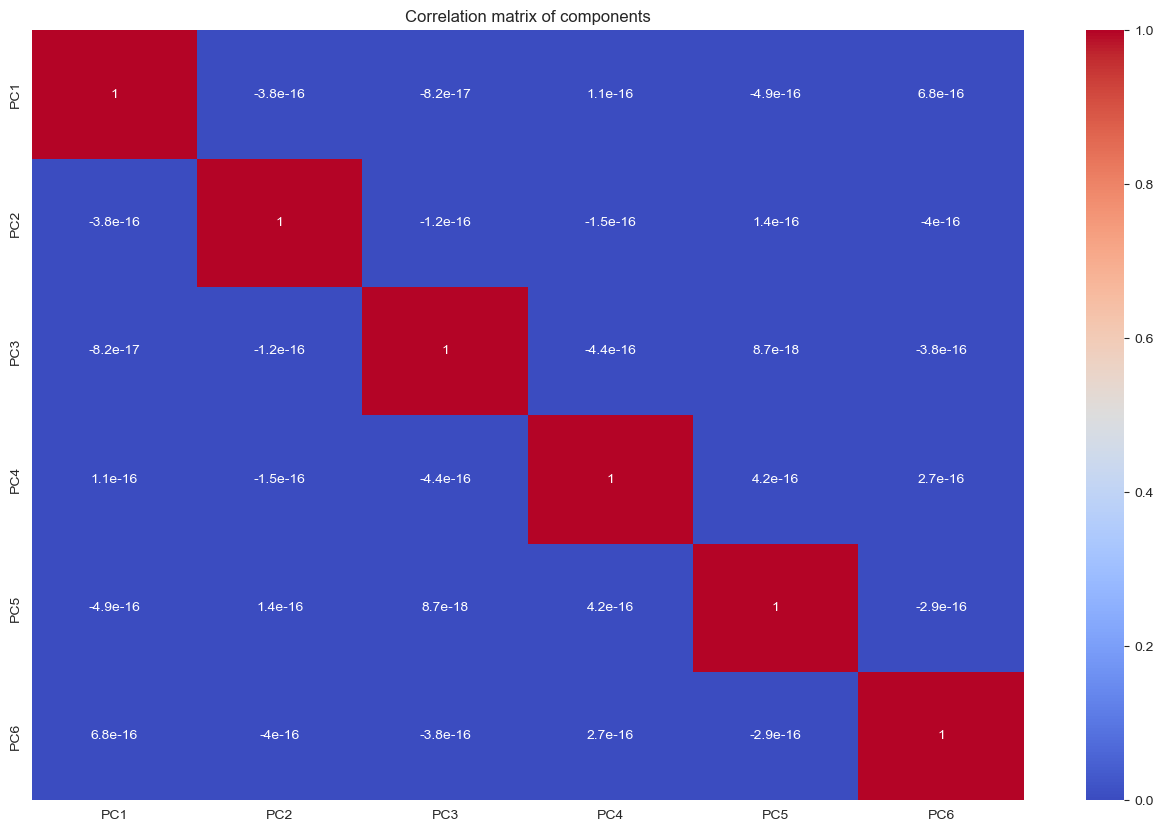

In [133]:
correlation_matrix = reduced_data_df.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation matrix of components")
plt.show()


## KMeans (45 points)
Implement kmeans from scratch.

In [134]:
import numpy as np


class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None  # To store the inertia (within-cluster sum of squares)
        self.labels_ = None  # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """

        n_samples, n_features = X.shape
        np.random.seed(self.random_state)

        random_centroids_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_centroids_indices]

        for _ in range(self.max_iter):
            self.nearest_centroid_label(X)
            new_centroids = np.array([X[self.labels_ == j].mean(axis=0) for j in range(self.n_clusters)])

            if np.allclose(new_centroids, self.centroids):
                break
            self.centroids = new_centroids
        self.inertia_ = self._calculate_inertia(X)

    def nearest_centroid_label(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - self.centroids[k], axis=1)
        self.labels_ = np.argmin(distances, axis=1)

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Step 1: For each cluster, compute the squared distances of points from their corresponding centroid
        # Step 2: Sum all squared distances to compute inertia

        s = 0.0
        for label, centroid in enumerate(self.centroids):
            cur_X = X[self.labels_ == label]
            s += np.sum((cur_X - centroid) ** 2)
            # print(s)
        return s




### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

In [135]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)

    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(reduced_data)
    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)
WCSS

[102107.87009885024,
 82835.05231405472,
 65903.2513800347,
 59178.076168361935,
 51621.8170830683,
 47493.76542119429,
 44420.65284327643,
 41625.760721461476,
 39181.0265016635,
 33913.431053865446,
 32471.395010920165,
 31369.984226307974,
 29860.52159932692,
 29259.840368639467,
 28113.44522555812,
 27456.119478788853,
 26379.811983451276,
 25777.55097584794,
 24740.596624770027,
 24187.46069521321,
 23595.125387414017,
 23088.21650592187,
 22623.03576859847,
 22040.908455245448,
 21634.902817643575,
 20997.50252949028,
 21233.29573861495,
 20461.8416281286,
 19829.10308344541]

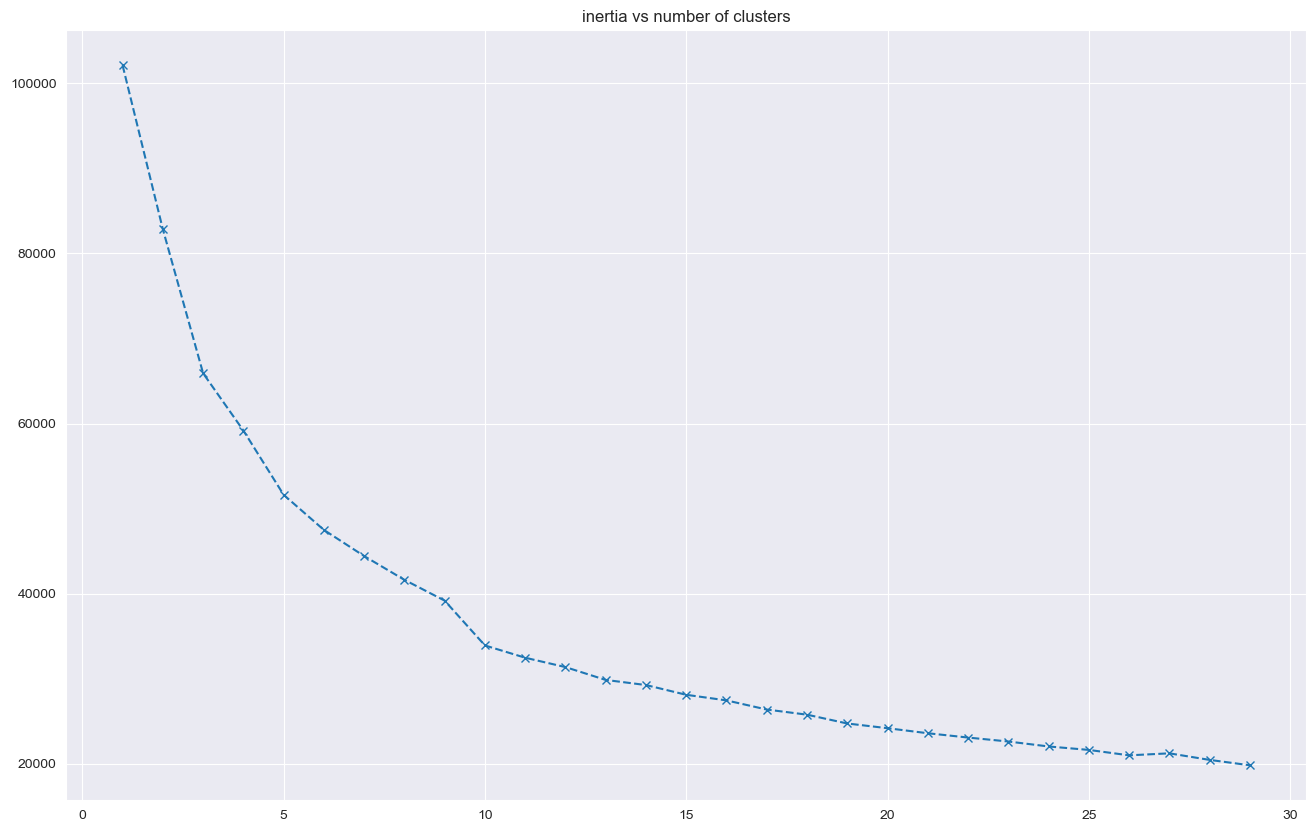

In [136]:
# Plot the Elbow curve using Matplotlib

plt.figure(figsize=(16, 10))
plt.plot(range(1, 30), WCSS, marker='x', linestyle='--')
plt.title("inertia vs number of clusters")
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [137]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method

opt_cluster_num = 7
opt_kmeans = CustomKMeans(n_clusters=opt_cluster_num, random_state=42)

opt_kmeans.fit(reduced_data)




In [138]:
# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
reduced_data_df['segment'] = opt_kmeans.labels_
reduced_data_df


,PC1,PC2,PC3,PC4,PC5,PC6,segment
0,1.731242,0.824084,-0.384320,-0.451623,-0.087766,0.438057,5
1,0.301398,-2.533638,0.621582,-0.939313,-0.794456,0.060615,1
2,-1.194199,0.887568,-1.184455,1.129115,-1.152626,-1.869029,3
3,0.930140,0.030106,-0.111213,-1.309452,-0.505452,-0.834667,5
4,1.499511,0.517780,-0.794300,-0.125376,-0.253049,0.326998,5
...,...,...,...,...,...,...,...
8945,1.041490,1.541647,1.550005,1.950163,2.962269,-0.947844,0
8946,1.212752,1.145803,0.739348,1.853214,3.246351,-1.323491,0
8947,1.506803,1.312796,1.454831,1.445816,3.065848,-1.355128,0
8948,2.346554,0.270672,1.736592,1.058714,2.959256,-1.237497,0


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

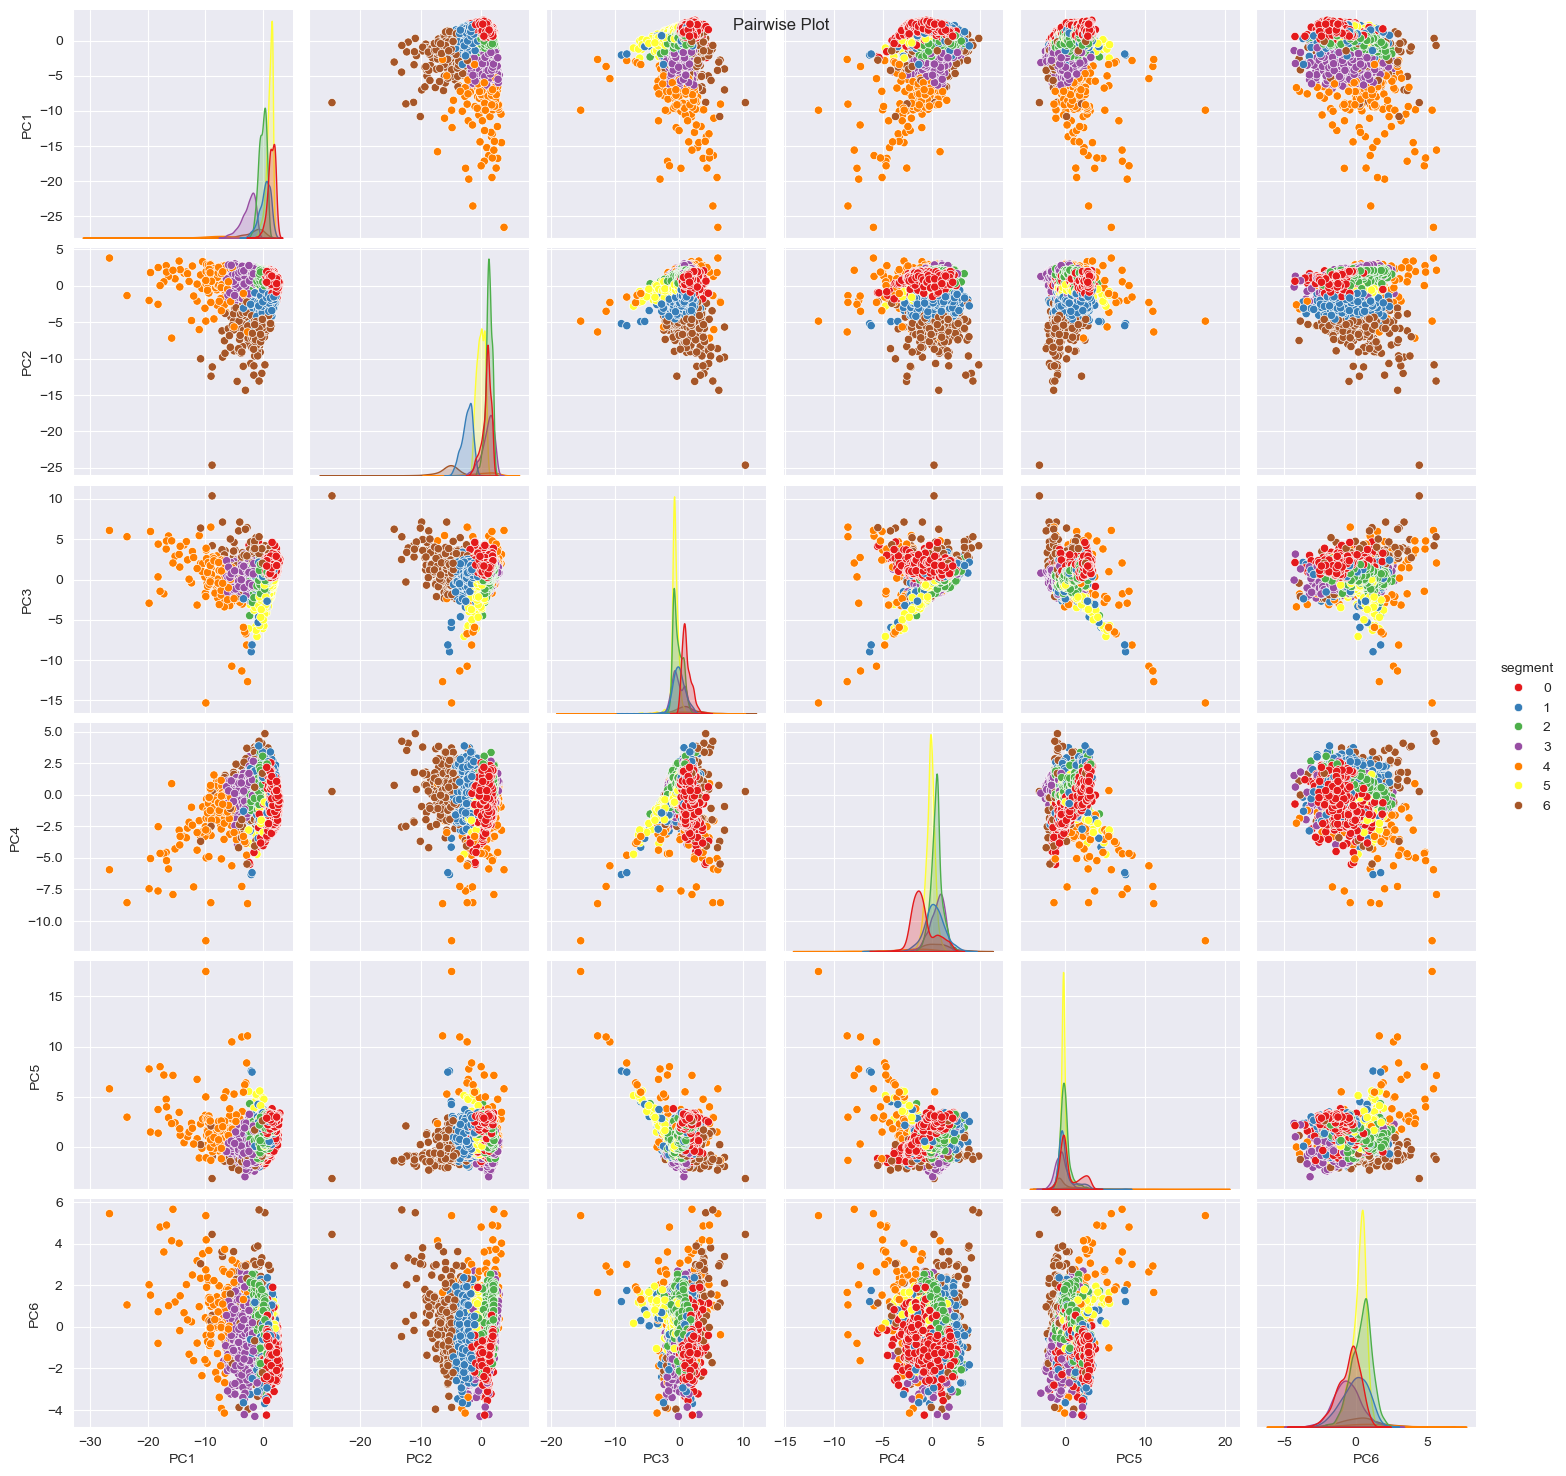

In [139]:
# todo

sns.pairplot(reduced_data_df, hue='segment', palette='Set1',diag_kind='kde')
plt.suptitle("Pairwise Plot")
plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


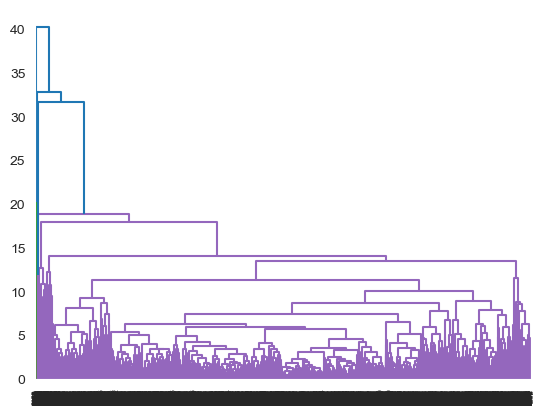

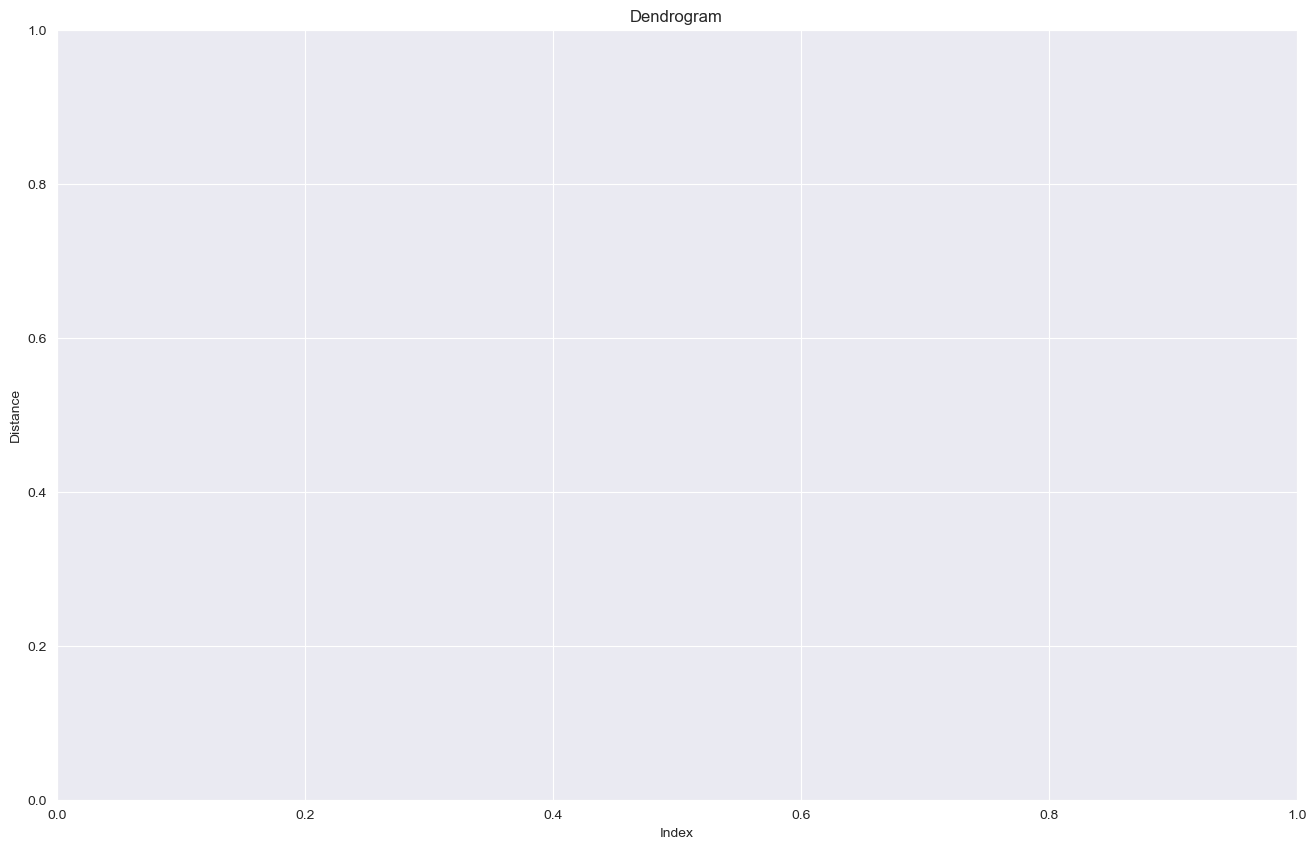

In [140]:
# Perform Hierarchical Clustering on the pca dataset
# Z = linkage(reduced_data.drop, method='complete')

# Visualize the dendrogram


Z = linkage(reduced_data, method='complete')
dendrogram(Z)

# Plot the dendrogram
plt.figure(figsize=(16, 10))
plt.title("Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

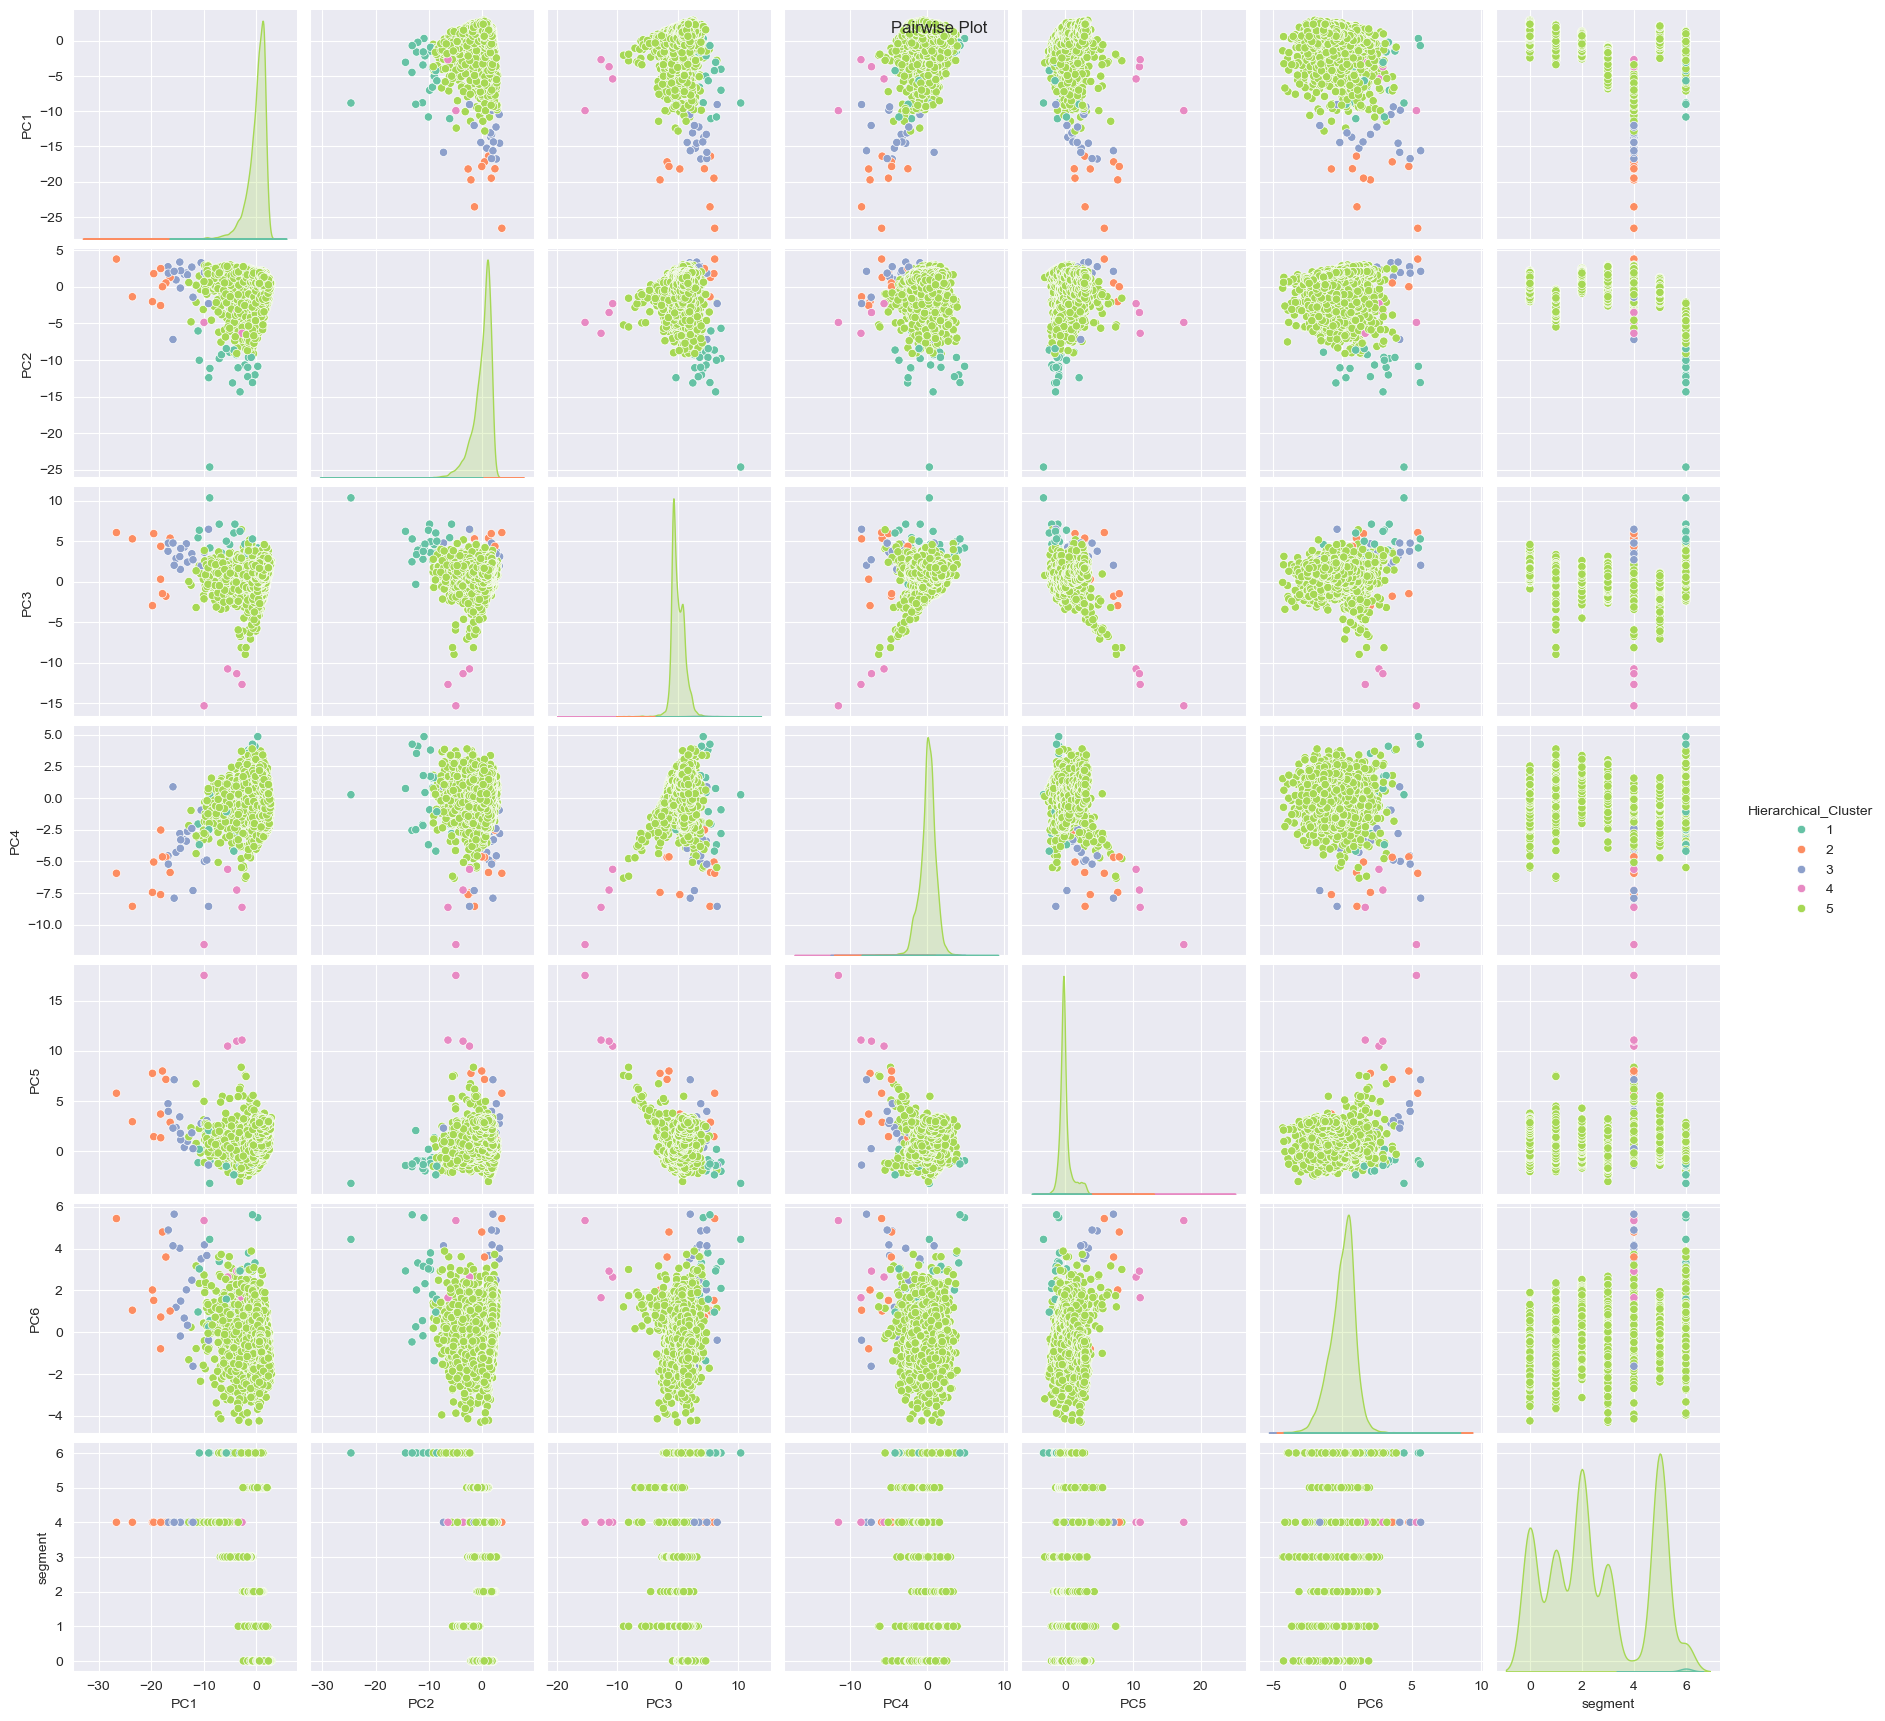

In [141]:
# Choose threshold and assign clusters

# Assign cluster labels to PCA DataFrame

# Visualize using PCA components

n_cluster = 5
hierarchical_clusters = fcluster(Z, n_cluster, criterion='maxclust') 
reduced_data_df['Hierarchical_Cluster'] = hierarchical_clusters

sns.pairplot(reduced_data_df, hue='Hierarchical_Cluster', palette='Set2',diag_kind='kde')
plt.suptitle("Pairwise Plot")
plt.show()